<a href="https://colab.research.google.com/github/SaharFallah99/Decision-Tree/blob/main/DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r'C:\Users\Asus\Desktop\processed.cleveland.data',header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

In [ ]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [ ]:
df[df['thal']=='?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [ ]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [ ]:
df[df['ca']=='?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
print(df.ca.mode())

0    0.0
dtype: object


In [ ]:
print(df.thal.mode())

0    3.0
dtype: object


In [ ]:
df['ca'].replace('?','0',inplace=True)
df['ca']=df['ca'].astype('float')
df['thal'].replace('?','3',inplace=True)
df['thal']=df['thal'].astype('float')

In [ ]:
df['ca'].unique()

array([0., 3., 2., 1.])

In [ ]:
df['thal'].unique()

array([6., 3., 7.])

In [ ]:
x=df.drop('hd',axis=1).copy()

In [ ]:
x

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [ ]:
y=df['hd'].copy()

In [ ]:
y

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: hd, Length: 303, dtype: int64

In [ ]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [ ]:
df=pd.get_dummies(x,columns=['cp','thal','slope','restecg'])

In [ ]:
df.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,thal_3.0,thal_6.0,thal_7.0,slope_1.0,slope_2.0,slope_3.0,restecg_0.0,restecg_1.0,restecg_2.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,1,0,0,0,1,0,0,1
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,1,0,0,0,1,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,1,0,0,1,0,0,0,0,1


In [ ]:
y_not_zero=y>0
y[y_not_zero]=1

In [ ]:
y.unique()

array([0, 1], dtype=int64)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [ ]:
scaler_f=scaler.transform(df)

In [ ]:
scaler_f

array([[ 0.94872647,  0.68620244,  0.75752504, ..., -0.9967051 ,
        -0.11566299,  1.02337544],
       [ 1.39200191,  0.68620244,  1.61121989, ..., -0.9967051 ,
        -0.11566299,  1.02337544],
       [ 1.39200191,  0.68620244, -0.6652997 , ..., -0.9967051 ,
        -0.11566299,  1.02337544],
       ...,
       [ 0.28381332,  0.68620244, -0.0961698 , ...,  1.00330579,
        -0.11566299, -0.97715849],
       [ 0.28381332, -1.4572959 , -0.0961698 , ..., -0.9967051 ,
        -0.11566299,  1.02337544],
       [-1.82174501,  0.68620244,  0.35913411, ...,  1.00330579,
        -0.11566299, -0.97715849]])

In [ ]:
df_scaler=pd.DataFrame(data=scaler_f , columns=df.columns)

In [ ]:
df_scaler

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,thal_3.0,thal_6.0,thal_7.0,slope_1.0,slope_2.0,slope_3.0,restecg_0.0,restecg_1.0,restecg_2.0
0,0.948726,0.686202,0.757525,-0.264900,2.394438,0.017197,-0.696631,1.087338,-0.711131,3.489114,...,-0.951662,-1.115547,3.979112,-0.793116,-0.939142,-0.926766,3.664502,-0.996705,-0.115663,1.023375
1,1.392002,0.686202,1.611220,0.760415,-0.417635,-1.821905,1.435481,0.397182,2.504881,-0.286606,...,1.050793,0.896421,-0.251312,-0.793116,-0.939142,1.079021,-0.272888,-0.996705,-0.115663,1.023375
2,1.392002,0.686202,-0.665300,-0.342283,-0.417635,-0.902354,1.435481,1.346147,1.432877,-0.286606,...,1.050793,-1.115547,-0.251312,1.260850,-0.939142,1.079021,-0.272888,-0.996705,-0.115663,1.023375
3,-1.932564,0.686202,-0.096170,0.063974,-0.417635,1.637359,-0.696631,2.122573,-0.711131,-0.286606,...,-0.951662,0.896421,-0.251312,-0.793116,-0.939142,-0.926766,3.664502,1.003306,-0.115663,-0.977158
4,-1.489288,-1.457296,-0.096170,-0.825922,-0.417635,0.980537,-0.696631,0.310912,-0.711131,-0.286606,...,-0.951662,0.896421,-0.251312,-0.793116,1.064802,-0.926766,-0.272888,-0.996705,-0.115663,1.023375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,0.686202,-1.234430,0.334813,-0.417635,-0.770990,-0.696631,0.138373,-0.711131,3.489114,...,-0.951662,-1.115547,-0.251312,1.260850,-0.939142,1.079021,-0.272888,1.003306,-0.115663,-0.977158
299,1.502821,0.686202,0.700612,-1.038723,2.394438,-0.376896,-0.696631,2.036303,1.432877,-0.286606,...,1.050793,-1.115547,-0.251312,1.260850,-0.939142,1.079021,-0.272888,1.003306,-0.115663,-0.977158
300,0.283813,0.686202,-0.096170,-2.238149,-0.417635,-1.515388,1.435481,0.138373,0.360873,-0.286606,...,1.050793,-1.115547,-0.251312,1.260850,-0.939142,1.079021,-0.272888,1.003306,-0.115663,-0.977158
301,0.283813,-1.457296,-0.096170,-0.206864,-0.417635,1.068113,-0.696631,-0.896862,0.360873,-0.286606,...,-0.951662,0.896421,-0.251312,-0.793116,-0.939142,1.079021,-0.272888,-0.996705,-0.115663,1.023375


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_scaler,y, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tr=DecisionTreeClassifier()

In [ ]:
tr=tr.fit(x_train,y_train)

In [ ]:
pred=tr.predict(x_test)

In [ ]:
pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [ ]:
x_train

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,thal_3.0,thal_6.0,thal_7.0,slope_1.0,slope_2.0,slope_3.0,restecg_0.0,restecg_1.0,restecg_2.0
287,0.394632,0.686202,-0.380735,-0.516393,-0.417635,-0.245532,-0.696631,-0.551783,-0.711131,-0.286606,...,-0.951662,-1.115547,-0.251312,1.260850,-0.939142,1.079021,-0.272888,1.003306,-0.115663,-0.977158
282,0.062176,-1.457296,-0.209996,-0.806576,-0.417635,-0.858566,1.435481,0.828529,0.360873,-0.286606,...,1.050793,-1.115547,-0.251312,1.260850,-0.939142,1.079021,-0.272888,-0.996705,8.645808,-0.977158
197,-1.046013,-1.457296,0.359134,-0.206864,-0.417635,0.104774,1.435481,-0.724323,-0.711131,-0.286606,...,1.050793,0.896421,-0.251312,-0.793116,-0.939142,1.079021,-0.272888,-0.996705,-0.115663,1.023375
158,0.616270,0.686202,0.472960,0.895834,-0.417635,0.892960,-0.696631,0.138373,1.432877,-0.286606,...,1.050793,-1.115547,-0.251312,1.260850,-0.939142,1.079021,-0.272888,-0.996705,-0.115663,1.023375
164,-0.713556,0.686202,-0.437648,0.160702,2.394438,1.111901,-0.696631,-0.896862,1.432877,-0.286606,...,-0.951662,0.896421,-0.251312,-0.793116,1.064802,-0.926766,-0.272888,1.003306,-0.115663,-0.977158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.048643,0.686202,3.432436,0.702378,-0.417635,1.987664,-0.696631,-0.896862,0.360873,-0.286606,...,-0.951662,-1.115547,-0.251312,1.260850,1.064802,-0.926766,-0.272888,-0.996705,-0.115663,1.023375
71,1.392002,0.686202,-0.380735,0.141357,2.394438,0.586443,-0.696631,-0.724323,1.432877,-0.286606,...,1.050793,-1.115547,-0.251312,1.260850,-0.939142,1.079021,-0.272888,1.003306,-0.115663,-0.977158
106,0.505451,0.686202,0.472960,-1.348253,-0.417635,0.542655,1.435481,-0.896862,0.360873,-0.286606,...,1.050793,-1.115547,-0.251312,1.260850,1.064802,-0.926766,-0.272888,1.003306,-0.115663,-0.977158
270,0.727089,0.686202,0.472960,-0.767885,-0.417635,-0.508261,1.435481,0.742260,0.360873,-0.286606,...,1.050793,-1.115547,-0.251312,1.260850,1.064802,-0.926766,-0.272888,-0.996705,-0.115663,1.023375


In [ ]:
x_test

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,thal_3.0,thal_6.0,thal_7.0,slope_1.0,slope_2.0,slope_3.0,restecg_0.0,restecg_1.0,restecg_2.0
179,-0.159462,0.686202,-0.096170,-0.013408,2.394438,1.024325,-0.696631,-0.896862,2.504881,-0.286606,...,-0.951662,0.896421,-0.251312,-0.793116,1.064802,-0.926766,-0.272888,-0.996705,-0.115663,1.023375
228,-0.048643,0.686202,-1.234430,-0.787231,-0.417635,-1.821905,1.435481,-0.896862,0.360873,-0.286606,...,1.050793,0.896421,-0.251312,-0.793116,-0.939142,1.079021,-0.272888,-0.996705,-0.115663,1.023375
111,0.172994,0.686202,-0.380735,0.044629,2.394438,-0.245532,1.435481,0.138373,0.360873,-0.286606,...,1.050793,0.896421,-0.251312,-0.793116,-0.939142,1.079021,-0.272888,-0.996705,-0.115663,1.023375
246,0.394632,0.686202,-1.803559,-0.245555,-0.417635,0.279926,-0.696631,-0.810592,0.360873,-0.286606,...,1.050793,-1.115547,-0.251312,1.260850,1.064802,-0.926766,-0.272888,1.003306,-0.115663,-0.977158
60,-0.381100,-1.457296,-0.096170,1.127981,-0.417635,-0.333108,1.435481,0.138373,-0.711131,-0.286606,...,1.050793,-1.115547,-0.251312,1.260850,-0.939142,1.079021,-0.272888,1.003306,-0.115663,-0.977158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,0.394632,0.686202,-0.665300,0.721724,-0.417635,0.455079,-0.696631,0.655990,-0.711131,-0.286606,...,-0.951662,0.896421,-0.251312,-0.793116,-0.939142,1.079021,-0.272888,-0.996705,-0.115663,1.023375
258,1.724458,0.686202,1.383568,-0.032753,-0.417635,-0.289320,-0.696631,-0.896862,-0.711131,-0.286606,...,-0.951662,0.896421,-0.251312,-0.793116,1.064802,-0.926766,-0.272888,-0.996705,-0.115663,1.023375
56,-0.491919,0.686202,0.472960,-0.264900,-0.417635,0.586443,-0.696631,-0.379244,0.360873,-0.286606,...,-0.951662,-1.115547,-0.251312,1.260850,-0.939142,1.079021,-0.272888,1.003306,-0.115663,-0.977158
242,-0.602738,-1.457296,-0.096170,0.431540,-0.417635,0.586443,-0.696631,-0.896862,-0.711131,-0.286606,...,1.050793,0.896421,-0.251312,-0.793116,1.064802,-0.926766,-0.272888,1.003306,-0.115663,-0.977158


In [ ]:
pd.DataFrame({'label':y_test,'Predicrions':pred})

,label,Predicrions
179,0,0
228,1,1
111,1,1
246,1,1
60,1,1
...,...,...
22,1,1
258,0,1
56,1,0
242,0,0


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,y_test))

[[23 11]
 [16 26]]


In [ ]:
from sklearn.metrics import plot_confusion_matrix

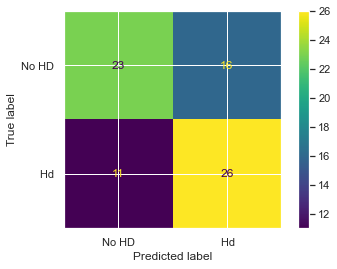

In [ ]:
plot_confusion_matrix(tr , x_test , y_test , display_labels=["No HD"," Hd"])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63        39
           1       0.62      0.70      0.66        37

    accuracy                           0.64        76
   macro avg       0.65      0.65      0.64        76
weighted avg       0.65      0.64      0.64        76



[Text(165.54000000000002, 207.55636363636364, 'X[12] <= 0.05\ngini = 0.495\nsamples = 227\nvalue = [125, 102]'),
 Text(72.54, 187.7890909090909, 'X[0] <= 0.228\ngini = 0.343\nsamples = 123\nvalue = [96, 27]'),
 Text(44.64, 168.0218181818182, 'X[7] <= 2.166\ngini = 0.169\nsamples = 75\nvalue = [68, 7]'),
 Text(37.2, 148.25454545454545, 'X[5] <= 1.966\ngini = 0.128\nsamples = 73\nvalue = [68, 5]'),
 Text(29.76, 128.48727272727274, 'X[5] <= -0.311\ngini = 0.105\nsamples = 72\nvalue = [68, 4]'),
 Text(14.88, 108.72, 'X[7] <= -0.552\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(7.44, 88.95272727272729, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(22.32, 88.95272727272729, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(44.64, 108.72, 'X[2] <= -1.178\ngini = 0.059\nsamples = 66\nvalue = [64, 2]'),
 Text(37.2, 88.95272727272729, 'X[18] <= 1.696\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(29.76, 69.18545454545455, 'X[5] <= 0.127\ngini = 0.165\nsamples = 11\nvalue = [10, 

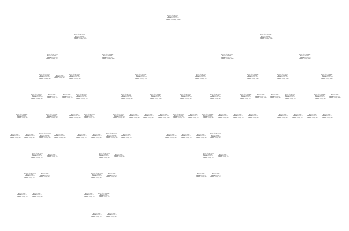

In [ ]:
import graphviz
from sklearn import tree
x=x_train
y=y_train
clf=tree.DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
tree.plot_tree(clf)

In [ ]:
dot_data=tree.export_graphviz(clf,out_file=None)

In [ ]:
graph=graphviz.Source(dot_data)
graph.format='png'
graph.render('dtree_render',view=True)

'dtree_render.png'

In [ ]:
dot_data=tree.export_graphviz(clf,filled=True,out_file=None,feature_names=x.columns,class_names=True,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)

SyntaxError: keyword argument repeated (<ipython-input-361-3328cb69f6cd>, line 1)

In [ ]:
graph

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.6052631578947368

In [ ]:
y_train_pred=tr.predict(x_train)
y_test_pred=tr.predict(x_test)

In [ ]:
path=tr.cost_complexity_pruning_path(x_train,y_train)
alphas=path['ccp_alphas']
alphas

array([0.        , 0.00293686, 0.00400481, 0.00416055, 0.00430517,
       0.00440529, 0.00453878, 0.00528634, 0.0056478 , 0.00572687,
       0.00660793, 0.00660793, 0.00744519, 0.00788314, 0.00798279,
       0.00800961, 0.00877544, 0.00899446, 0.01488222, 0.0154185 ,
       0.01590662, 0.02686878, 0.02695892, 0.03428884, 0.04838798,
       0.12494069])

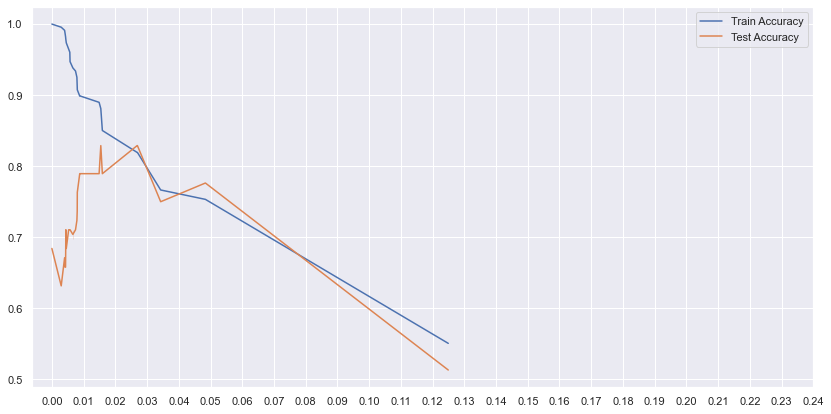

In [ ]:
accuracy_train,accuracy_test=[],[]
for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    tree.fit(x_train,y_train)
    y_train_pred=tree.predict(x_train)
    y_test_pred=tree.predict(x_test)
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label='Train Accuracy')
sns.lineplot(y=accuracy_test,x=alphas,label='Test Accuracy')
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score
import statistics

In [ ]:
accuracy_train,accuracy_test=[],[]
cnt=1
for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    tree.fit(x_train,y_train)
    y_train_pred=tree.predict(x_train)
    y_test_pred=tree.predict(x_test)
    kf=KFold(n_splits=5,shuffle=True, random_state=42)
    for train_index,test_index in kf.split(x,y):
        print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}, mean train:{np.mean(accuracy_score(y_train,y_train_pred))},mean test:{np.mean(accuracy_score(y_test,y_test_pred))} ,varianc train:{np.var(accuracy_score(y_train,y_train_pred))},variance test:{np.var(accuracy_score(y_test,y_test_pred))}')

        cnt += 1

Fold:1, Train set: 181, Test set:46, mean train:1.0,mean test:0.631578947368421 ,varianc train:0.0,variance test:0.0
Fold:2, Train set: 181, Test set:46, mean train:1.0,mean test:0.631578947368421 ,varianc train:0.0,variance test:0.0
Fold:3, Train set: 182, Test set:45, mean train:1.0,mean test:0.631578947368421 ,varianc train:0.0,variance test:0.0
Fold:4, Train set: 182, Test set:45, mean train:1.0,mean test:0.631578947368421 ,varianc train:0.0,variance test:0.0
Fold:5, Train set: 182, Test set:45, mean train:1.0,mean test:0.631578947368421 ,varianc train:0.0,variance test:0.0
Fold:6, Train set: 181, Test set:46, mean train:0.9955947136563876,mean test:0.5921052631578947 ,varianc train:0.0,variance test:0.0
Fold:7, Train set: 181, Test set:46, mean train:0.9955947136563876,mean test:0.5921052631578947 ,varianc train:0.0,variance test:0.0
Fold:8, Train set: 182, Test set:45, mean train:0.9955947136563876,mean test:0.5921052631578947 ,varianc train:0.0,variance test:0.0
Fold:9, Train se

Fold:78, Train set: 182, Test set:45, mean train:0.9074889867841409,mean test:0.7631578947368421 ,varianc train:0.0,variance test:0.0
Fold:79, Train set: 182, Test set:45, mean train:0.9074889867841409,mean test:0.7631578947368421 ,varianc train:0.0,variance test:0.0
Fold:80, Train set: 182, Test set:45, mean train:0.9074889867841409,mean test:0.7631578947368421 ,varianc train:0.0,variance test:0.0
Fold:81, Train set: 181, Test set:46, mean train:0.8986784140969163,mean test:0.7894736842105263 ,varianc train:0.0,variance test:0.0
Fold:82, Train set: 181, Test set:46, mean train:0.8986784140969163,mean test:0.7894736842105263 ,varianc train:0.0,variance test:0.0
Fold:83, Train set: 182, Test set:45, mean train:0.8986784140969163,mean test:0.7894736842105263 ,varianc train:0.0,variance test:0.0
Fold:84, Train set: 182, Test set:45, mean train:0.8986784140969163,mean test:0.7894736842105263 ,varianc train:0.0,variance test:0.0
Fold:85, Train set: 182, Test set:45, mean train:0.89867841409

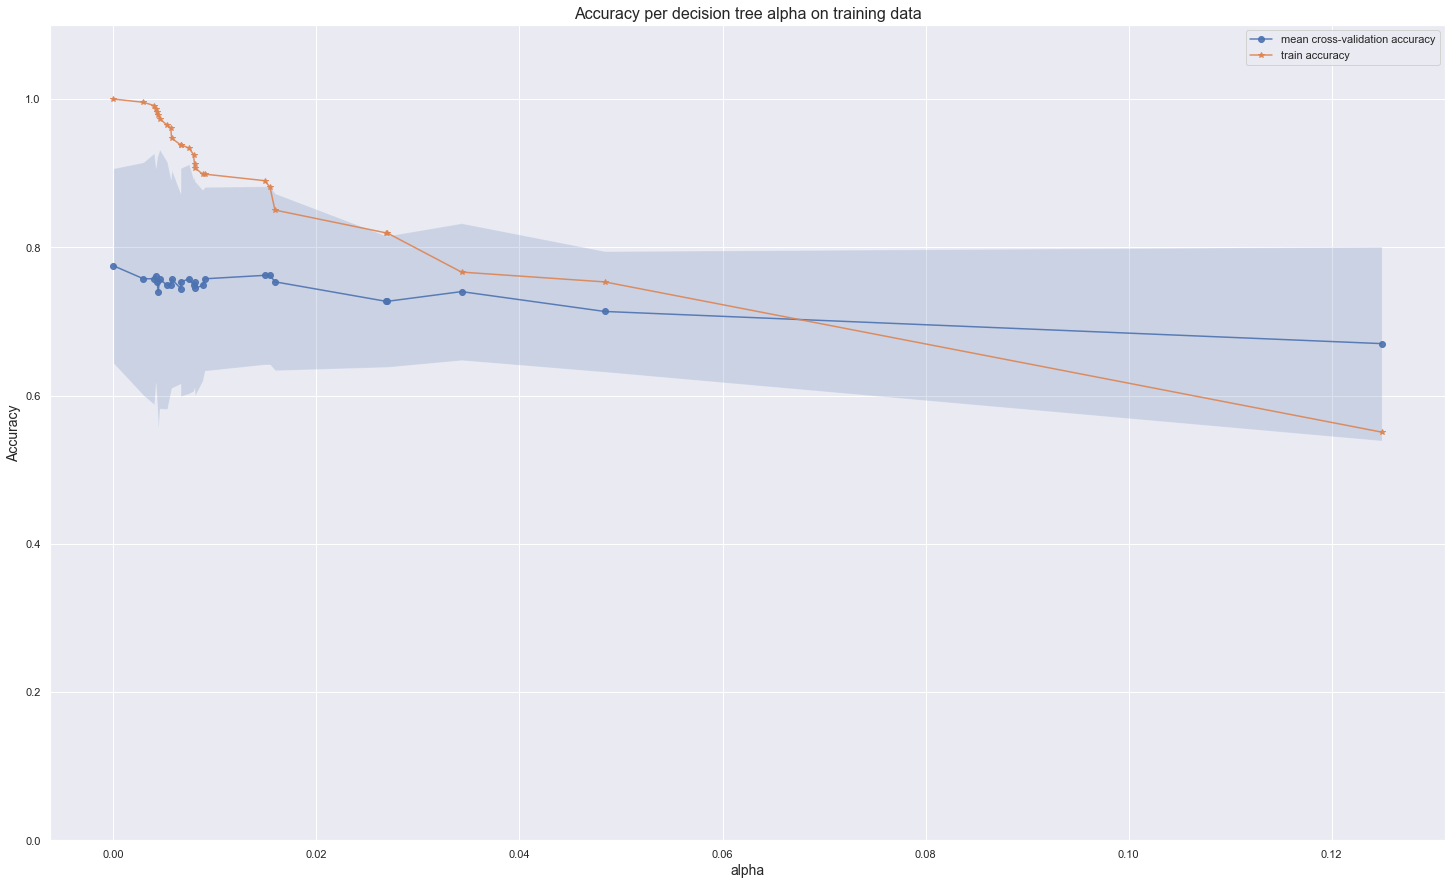

In [ ]:
import matplotlib.pyplot as plt

def run_cross_validation_on_trees(x, y, alphas, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for i in alphas:
        tree_model = DecisionTreeClassifier(ccp_alpha=i)
        cv_scores = cross_val_score(tree_model, x, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(x, y).score(x, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(25,15))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('alpha', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_ylim((0,1.1))
    ax.legend()

sm_tree_depths = alphas
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(x_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores,
                               'Accuracy per decision tree alpha on training data')

In [ ]:
path=tr.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]
clf_dts=[]
for ccp_alpha in ccp_alphas:
    tr=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    tr.fit(x_train,y_train)
    clf_dts.append(tr)

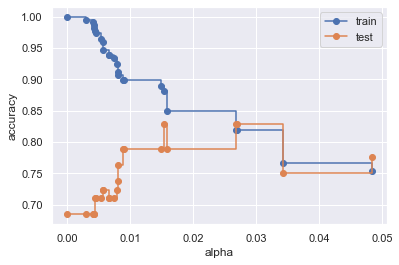

In [ ]:
train_scores=[tr.score(x_train,y_train) for tr in clf_dts]
test_scores=[tr.score(x_test,y_test) for tr in clf_dts]
fig , ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
ax.legend()

<AxesSubplot:xlabel='tree'>

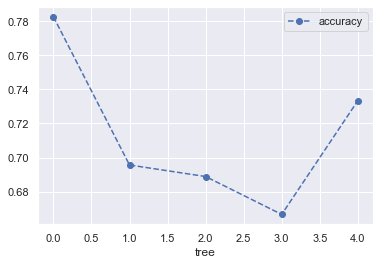

In [ ]:
clf_dot=DecisionTreeClassifier(random_state=0,ccp_alpha=0.016)
scores=cross_val_score(tr , x_train,y_train , cv=5)
df=pd.DataFrame(data={'tree':range(5),'accuracy':scores})
df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

<AxesSubplot:xlabel='alpha'>

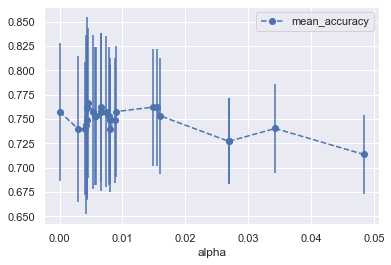

In [ ]:
alpha_loop_values=[]
for ccp_alpha in ccp_alphas:
    tr=DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    scores=cross_val_score(tr,x_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
alpha_resualt=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])
alpha_resualt.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [ ]:
param=ccp_alphas[np.argmax(test_scores)]

In [ ]:
clfp=DecisionTreeClassifier(ccp_alpha=param,random_state=42)
clfp.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.015418502202643174, random_state=42)

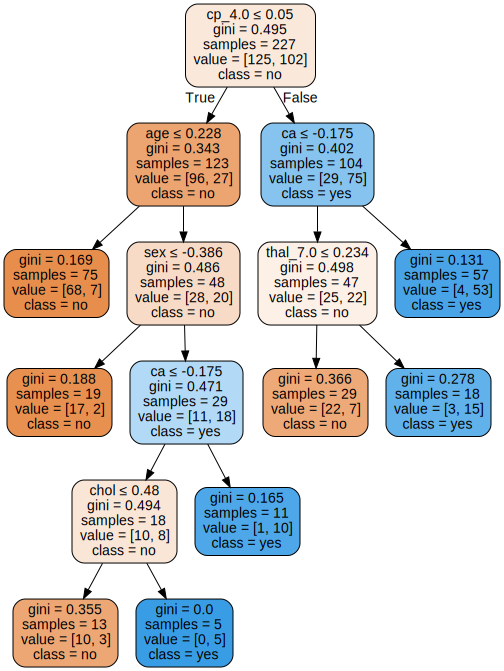

In [ ]:
from sklearn import tree
dot_data_p=tree.export_graphviz(clfp ,filled=True, out_file=None , feature_names=x.columns , class_names=['no','yes'],rounded=True , special_characters=True)
graph_p=graphviz.Source(dot_data_p)
graph_p

In [ ]:
graph_p.format='png'
graph_p.render('dtree_render2',view=True)

'dtree_render2.png'

In [ ]:
from sklearn.model_selection import cross_val_score
mean_accuracy=[]
var_accuracy=[]
for i in alphas:
    clf=DecisionTreeClassifier(ccp_alpha=i)
    scores=cross_val_score(estimator=clf , X=x , y= y , cv=5 , scoring='accuracy')
    mean_accuracy.append((scores.mean()))
    var_accuracy.append((scores.var()))
print(mean_accuracy)
print(var_accuracy)

[0.7531400966183575, 0.7528502415458938, 0.7398067632850241, 0.7440579710144928, 0.757391304347826, 0.7529468599033816, 0.7707246376811594, 0.757391304347826, 0.7574879227053141, 0.7617391304347826, 0.748792270531401, 0.7529468599033816, 0.757487922705314, 0.7530434782608696, 0.7444444444444445, 0.7486956521739131, 0.7618357487922705, 0.7532367149758454, 0.7534299516908212, 0.7621256038647343, 0.7621256038647343, 0.7270531400966183, 0.7270531400966183, 0.7401932367149758, 0.7134299516908211, 0.670048309178744]
[0.0074378398562393476, 0.010525202455133139, 0.007311405166981725, 0.008984144320754277, 0.0066268431001890405, 0.007134224836052185, 0.005725743891339352, 0.006446302130738174, 0.005416322434595909, 0.0067327032136105915, 0.005092860976918951, 0.005734518891922802, 0.0059834301850685, 0.004335821139349811, 0.005252491306681606, 0.004154346659198583, 0.005521342388387131, 0.004639398819108967, 0.003560185768629375, 0.003613955984970481, 0.003613955984970481, 0.001957385236528274

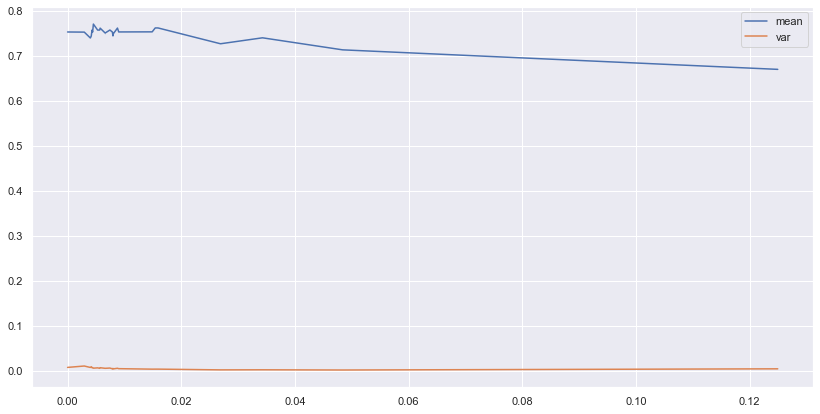

In [ ]:
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=mean_accuracy , x=alphas , label='mean')
sns.lineplot(y=var_accuracy , x=alphas , label='var')
plt.show()